## Uppgift 1

In [10]:
import pandas as pd

# Filens sökväg
filnamn = "C:/Users/pepef/Desktop/labb_2/riket2023_åk9_np.xlsx"

# Kolumnnamn för datan
columns = ["Plats", "Huvudman", "Totalt_A_F", "Flickor_A_F", "Pojkar_A_F",
           "Totalt_A_E", "Flickor_A_E", "Pojkar_A_E", "Totalt_poäng", "Flickor_poäng", "Pojkar_poäng"]

# Funktion för att läsa in ett specifikt ämne och förbereda data
def läs_in_sheet(sheet_namn):
    df = pd.read_excel(filnamn, skiprows=8, sheet_name=sheet_namn)
    df.columns = columns  # Byt kolumnnamn
    return df

# Läs in data för alla ämnen
df_svenska = läs_in_sheet("Svenska")
df_engelska = läs_in_sheet("Engelska")
df_matematik = läs_in_sheet("Matematik")
df_sva = läs_in_sheet("Svenska som andraspråk")

# Visa tabellen för varje ämne
print("Svenska:")
print(df_svenska.head())  # Visar de första 5 raderna

print("\nEngelska:")
print(df_engelska.head())

print("\nMatematik:")
print(df_matematik.head())

print("\nSvenska som andraspråk:")
print(df_sva.head())






Svenska:
   Plats    Huvudman  Totalt_A_F  Flickor_A_F  Pojkar_A_F  Totalt_A_E  \
0  Riket    Samtliga       93225        45800       47425        96.1   
1  Riket    Kommunal       72771        35484       37287        95.7   
2  Riket     Enskild       20414        10297       10117        97.6   
3  Riket  Skolverket          40           19          21       100.0   

   Flickor_A_E  Pojkar_A_E  Totalt_poäng  Flickor_poäng  Pojkar_poäng  
0         97.9        94.4          13.6           14.5          12.7  
1         97.6        93.8          13.3           14.3          12.4  
2         98.7        96.6          14.4           15.2          13.5  
3        100.0       100.0          15.0           15.9          14.2  

Engelska:
   Plats    Huvudman  Totalt_A_F  Flickor_A_F  Pojkar_A_F  Totalt_A_E  \
0  Riket    Samtliga      106941        51864       55077        97.0   
1  Riket    Kommunal       84310        40675       43635        96.6   
2  Riket     Enskild       22582   

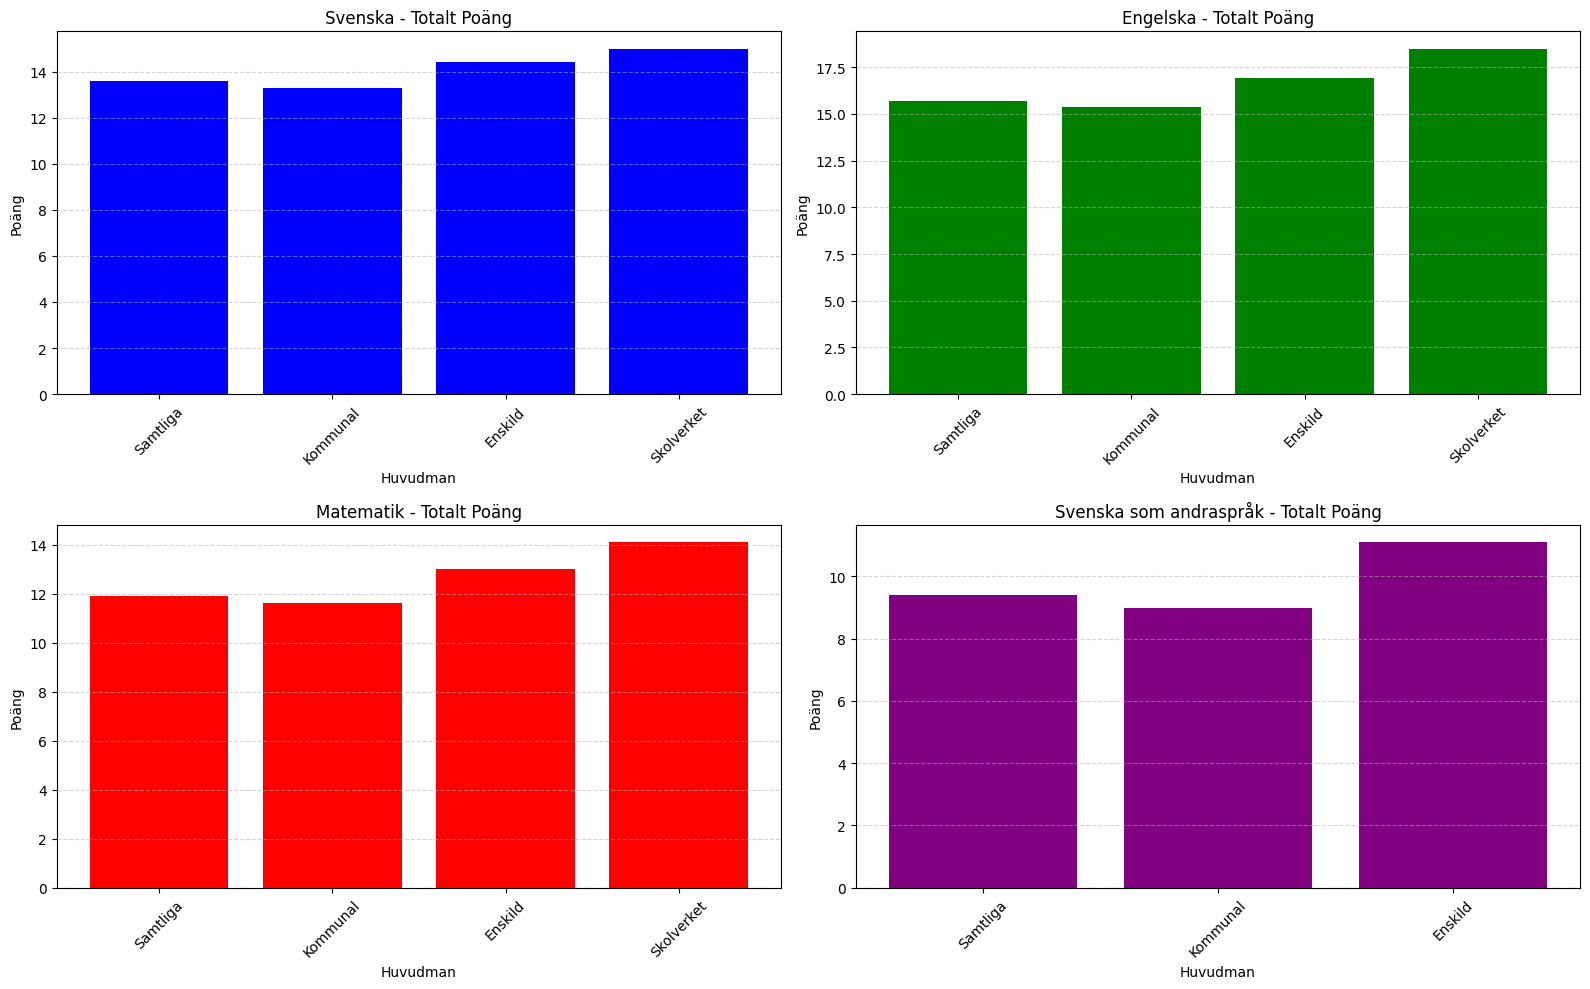

In [ ]:
import os

# Ensure 'ämnen' is defined
ämnen = [  
	läs_in_sheet("Svenska"),
	läs_in_sheet("Engelska"),
	läs_in_sheet("Matematik"),
	läs_in_sheet("Svenska som andraspråk")
]

# Extract dataframes for each subject from the 'ämnen' list
df_svenska = ämnen[0]
df_engelska = ämnen[1]
df_matematik = ämnen[2]
df_sva = ämnen[3]

# 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Svenska
axes[0, 0].bar(df_svenska["Huvudman"], df_svenska["Totalt_poäng"], color ="blue")
axes[0, 0].set_title("Svenska - Totalt Poäng")
axes[0, 0].set_xlabel("Huvudman")
axes[0, 0].set_ylabel("Poäng")
plt.sca(axes[0, 0])  
plt.xticks(rotation=45)
axes[0, 0].grid(True, axis='y', linestyle="--", alpha=0.5)


# Engelska
axes[0, 1].bar(df_engelska["Huvudman"], df_engelska["Totalt_poäng"], color='green')
axes[0, 1].set_title("Engelska - Totalt Poäng")
axes[0, 1].set_xlabel("Huvudman")
axes[0, 1].set_ylabel("Poäng")
plt.sca(axes[0, 1])
plt.xticks(rotation=45)
axes[0, 1].grid(True, axis='y', linestyle="--", alpha=0.5)


# Matematik tabelen
axes[1, 0].bar(df_matematik["Huvudman"], df_matematik["Totalt_poäng"], color='red')
axes[1, 0].set_title("Matematik - Totalt Poäng")
axes[1, 0].set_xlabel("Huvudman")
axes[1, 0].set_ylabel("Poäng")
plt.sca(axes[1, 0])
plt.xticks(rotation=45)
axes[1, 0].grid(True, axis='y', linestyle="--", alpha=0.5)


# Svenska som andraspråk tabelen
axes[1, 1].bar(df_sva["Huvudman"], df_sva["Totalt_poäng"], color='purple')
axes[1, 1].set_title("Svenska som andraspråk - Totalt Poäng")
axes[1, 1].set_xlabel("Huvudman")
axes[1, 1].set_ylabel("Poäng")
plt.sca(axes[1, 1])
plt.xticks(rotation=45)
axes[1, 1].grid(True, axis='y', linestyle="--", alpha=0.5)


plt.tight_layout()
plt.savefig("visualiseringar/np_totalt_poäng.png")
plt.show()



## Uppgift 2 linjediagram

In [7]:

import pandas as pd
import plotly.express as px
import os


# Läs in filen 'betyg_o_prov_riksnivå.xlsx' från rätt sökväg
df_betyg = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7)

# Ändra kolumnnamn för att göra det lättare att arbeta med datan
columns2 = ["Läsår", "Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)", "Totalt", 
            "Flickor", "Pojkar", "Totalt Ej Godkänt", "Flickor(ig)", "Pojkar(ig)"]
df_betyg.columns = columns2

# a) Rita linjediagram för andel elever som saknar godkänt betyg
df_betyg_ejgodkänt = df_betyg[["Läsår", "Totalt Ej Godkänt", "Flickor(ig)", "Pojkar(ig)"]]
fig1 = px.line(df_betyg_ejgodkänt, x="Läsår", y=["Totalt Ej Godkänt", "Flickor(ig)", "Pojkar(ig)"],
               title="Andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23",
               markers=True)
import plotly.io as pio
pio.renderers.default = 'browser'


fig1.show()


# b) Rita linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar
df_betyg_merit = df_betyg[["Läsår", "Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)"]]
fig2 = px.line(df_betyg_merit, x="Läsår", y=["Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)"],
               title="Meritvärde för 16 ämnen för totalt, flickor och pojkar för läsåren 18-23",
               markers=True)
fig2.show()